## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [25]:
# import  IPython.display as dp
# with open('README.md','r+', encoding='utf-8') as f:
#     dp.display(dp.Markdown(f.read()))

> ### Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
!pip install -U fsds
from fsds.imports import *


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


fsds v0.2.9 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
import os,glob
# display(os.listdir('zippedData'))


files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [3]:
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
os.path.split(files[0])[-1].replace('.csv.gz','')

'imdb.title.crew'

In [5]:
DATA = {}
for file in files:
    print(file)
    key = os.path.split(file)[-1].replace('.csv.gz','').replace('tsv.gz','')
    if ".tsv" in file:
        sep='\t'
        encode = 'latin-1'#'utf-8'
    else:
        sep=','
        encode='utf-8'
    DATA[key] = pd.read_csv(file,sep=sep,encoding=encode)#,index_col=0)

zippedData/imdb.title.crew.csv.gz
zippedData/tmdb.movies.csv.gz
zippedData/imdb.title.akas.csv.gz
zippedData/imdb.title.ratings.csv.gz
zippedData/imdb.name.basics.csv.gz
zippedData/rt.reviews.tsv.gz
zippedData/imdb.title.basics.csv.gz
zippedData/rt.movie_info.tsv.gz
zippedData/tn.movie_budgets.csv.gz
zippedData/bom.movie_gross.csv.gz
zippedData/imdb.title.principals.csv.gz


# Preview Data

## Questions

- **Where are the gross box office numbers?**
    - rt.movie_info.
        - Key: ?
        
    - tn.movie_budgets
        - Key:
        
    - bom.movie_gross
        - Key: 
        
- **What website is that table from?**
    - What other tables are from the same source and can be joined easily?

- **What columns may require extensive pre-processing?**
    - Any Genre columns
        - `rt.movie.info.['genre']`

In [6]:
for tablename, data in DATA.items():
#     print('---'*20+'\n'+f"{tablename}:")
    try:
        display(data.head(2).style.set_caption(f"{tablename}"))
        print(len(data))
    except:
        display(data.head(2).reset_index().style.set_caption(f"{tablename}"))
    print()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,nan,"nm0175726,nm1802864"


146144



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


26517



,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,nan,nan,0
1,tt0369610,11,Jurashikku warudo,JP,nan,imdbDisplay,nan,0


331703



,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


73856



,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


606648



,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,nan,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


54432



,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"


146144



,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",nan,nan,104 minutes,nan
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


1560



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


5782



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,4.15e+08,652000000,2010
1,Alice in Wonderland (2010),BV,3.342e+08,691300000,2010


3387



,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,nan,"[""The Man""]"
1,tt0111414,2,nm0398271,director,nan,nan


1028186



## Join rt.movie_info (`dfrt`) & tn.movie_budgets (`tn_budgets`)

In [32]:
dfrt = DATA['rt.movie_info.'].copy()
dfrt['date_index'] = pd.to_datetime(dfrt['theater_date'])
dfrt.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,date_index
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971-10-09
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012-08-17
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996-09-13


In [33]:
## ADDRESS NUMERIC COLUMNS TO CONVERT
dfrt['runtime'] = dfrt['runtime'].str.replace(' minutes','').astype(float)
dfrt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,date_index
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104.0,NaN,1971-10-09
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One,2012-08-17
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116.0,NaN,1996-09-13
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128.0,NaN,1994-12-09
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200.0,NaN,NaT


In [34]:
dfrt.shape

(1560, 13)

In [35]:
tn_budgets = DATA['tn.movie_budgets'].copy()
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [36]:
## Fix Currency
num_cols = ['production_budget','domestic_gross','worldwide_gross']
for col in num_cols:
    tn_budgets[col] = pd.to_numeric(tn_budgets[col].apply(lambda x: x.replace('$','').replace(',','')))#,errors='coerce')
    
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


### Make df1

In [37]:
## Make indices as datetime to test merge
left ='theater_date'
right = 'release_date'

rt_index = pd.to_datetime(dfrt[left])
tn_index = pd.to_datetime(tn_budgets[right])

dfrt['index'] = rt_index.copy()
tn_budgets['index'] = tn_index.copy()

## Merge idex 
df1= pd.merge(dfrt,tn_budgets, on='index')
df1

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,date_index,index,id_y,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104.0,NaN,1971-10-09,1971-10-09,71,"Oct 9, 1971",The French Connection,2200000,41158757,41158757
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One,2012-08-17,2012-08-17,81,"Aug 17, 2012",The Expendables 2,100000000,85028192,311979256
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One,2012-08-17,2012-08-17,89,"Aug 17, 2012",ParaNorman,60000000,56003051,108119662
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One,2012-08-17,2012-08-17,96,"Aug 17, 2012",Sparkle,10000000,24397469,24660323
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One,2012-08-17,2012-08-17,4,"Aug 17, 2012",The Awakening,4900000,95933,6924321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107.0,Warner Bros. Pictures,1999-06-30,1999-06-30,62,"Jun 30, 1999","South Park: Bigger, Longer & Uncut",21000000,52037603,52037603
2068,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106.0,New Line Cinema,2006-08-18,2006-08-18,75,"Aug 18, 2006",Snakes on a Plane,33000000,34020814,62020814
2069,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106.0,New Line Cinema,2006-08-18,2006-08-18,22,"Aug 18, 2006",The Illusionist,16500000,39868642,83792062
2070,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106.0,New Line Cinema,2006-08-18,2006-08-18,6,"Aug 18, 2006",Trust the Man,9000000,1530535,2548378


### Saving & Cleaning Main DF So Far

In [39]:
import os
os.makedirs('data/',exist_ok=True)

In [40]:
# df1.to_csv('data/df1_rt_tn_merged.csv',index=False)
df1=pd.read_csv('data/df1_rt_tn_merged.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               2072 non-null   int64  
 1   synopsis           2071 non-null   object 
 2   rating             2072 non-null   object 
 3   genre              2072 non-null   object 
 4   director           1832 non-null   object 
 5   writer             1708 non-null   object 
 6   theater_date       2072 non-null   object 
 7   dvd_date           2072 non-null   object 
 8   currency           1207 non-null   object 
 9   box_office         1207 non-null   object 
 10  runtime            2057 non-null   float64
 11  studio             1523 non-null   object 
 12  date_index         2072 non-null   object 
 13  index              2072 non-null   object 
 14  id_y               2072 non-null   int64  
 15  release_date       2072 non-null   object 
 16  movie              2072 

In [41]:
plt.style.use('seaborn-talk')

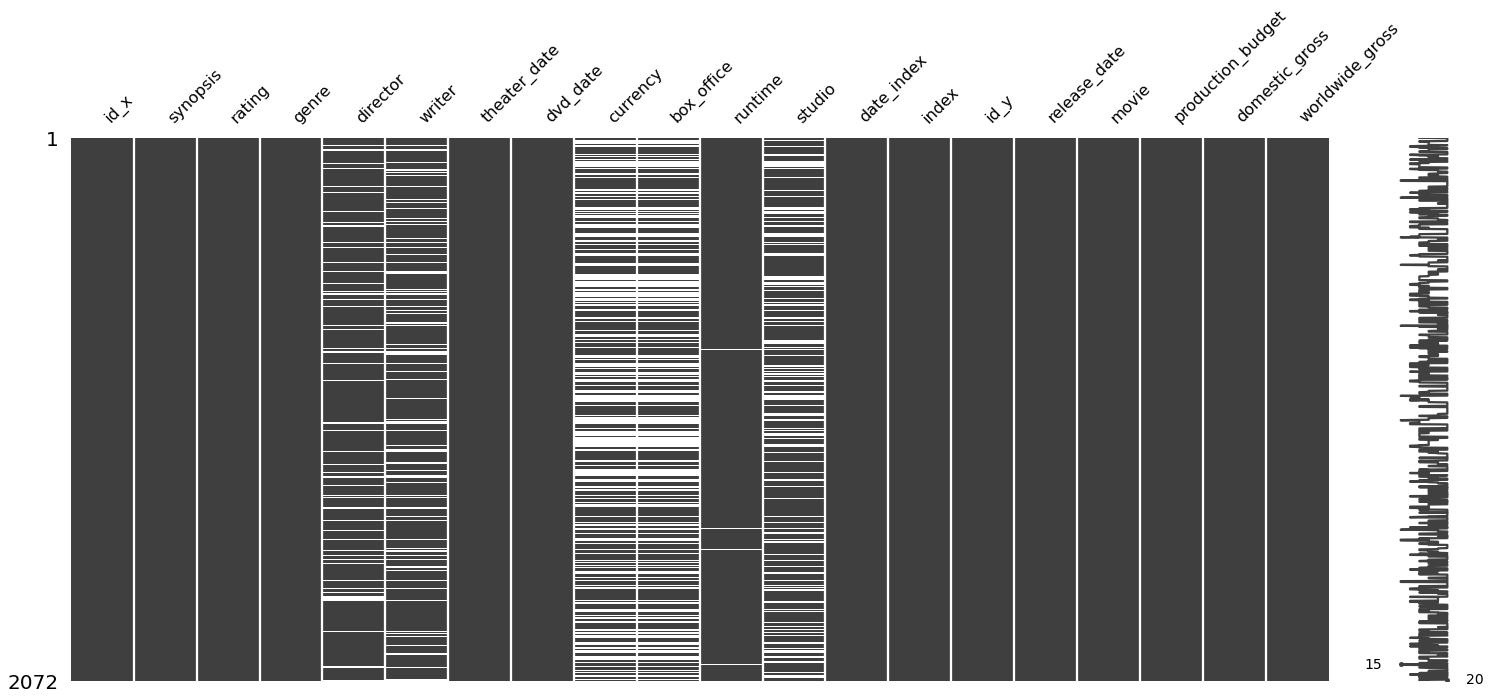

In [42]:
import missingno as ms
ms.matrix(df1)

In [43]:
# df1.plot(kind='scatter',x='production_budget',y='domestic_gross')

In [44]:
def column_report(df1,styled=False,cmap='Reds'):
    """Returns a report of the dtypes, num null, % null, and num of unique values
    """
    report = pd.DataFrame(index=df1.columns)

    report['dtype']=df1.dtypes

    report['num_null'] = df1.isna().sum()
    report['% null'] = round(df1.isna().sum()/len(df1)*100,2)

    report['nunique'] = df1.nunique()
    
    if styled:
        s = report.style.bar('% null').background_gradient(subset=['nunique'],
                                                           cmap=cmap)
        display(s)
    else:
        return report#.style.background_gradient(subset=['num_null'],cmap='Reds')


column_report(df1,True)#.style.bar('% null').background_gradient(subset=['nunique'],

,dtype,num_null,% null,nunique
id_x,int64,0,0.000000,671
synopsis,object,1,0.050000,669
rating,object,0,0.000000,6
genre,object,0,0.000000,162
director,object,240,11.580000,527
writer,object,364,17.570000,531
theater_date,object,0,0.000000,550
dvd_date,object,0,0.000000,492
currency,object,865,41.750000,1
box_office,object,865,41.750000,306


# ADDING TMDB API

## Extracting Movies with tmbd api


### References

- Getting Started 
    - https://developers.themoviedb.org/3/getting-started/introduction

- API info saved in ~/.secret/tmdg_api.json
    - https://www.themoviedb.org/settings/api
```python
f"https://api.themoviedb.org/3/movie/76341?api_key={api_key}"
```

- How to authenticate?
    - [Authentification](https://developers.themoviedb.org/3/getting-started/authentication)
    - [Create auth token](https://developers.themoviedb.org/3/authentication/create-request-token)

In [57]:
dftm = DATA['tmdb.movies']
dftm.drop(columns=['Unnamed: 0'],inplace=True)
dftm

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [58]:
import json
import pandas as pd
import requests

In [59]:
with open('/Users/jamesirving/.secret/tmdb_api.json') as f:
    api_info = json.load(f)
api_key = api_info['api-key']

In [60]:
base_url = f"https://api.themoviedb.org/3/movie/76341?api_key={api_key}"
base_url

'https://api.themoviedb.org/3/movie/76341?api_key=e9a24ea6085f06fdd272dab49ad70c2e'

In [61]:
import requests
## get session id
def get_session_id():
    token_url = f"https://api.themoviedb.org/3/authentication/token/new?api_key={api_key}"
    response = requests.get(token_url)
    display(response)
    return response.json()

In [62]:
sid = get_session_id()
sid_token = sid['request_token'];

<Response [200]>

## Find by id
https://developers.themoviedb.org/3/find/find-by-id

- Need: 
    - external_df
    
    - api_key
    - language
    - external_source  (imdb_id, freebase_mid, freebase_id, tvdb_id, tvrage_id, facebook_id, twitter_id, instagram_id)
    
```python
url = f"https://api.themoviedb.org/3/find/tt0111414?api_key={api_key}&language=en-US&external_source={imdb_id}"
```

In [67]:
dftm['id'][0]

12444

In [68]:
id_ = dftm['id'][0]
source = "imdb_id"

base_find_url = "https://api.themoviedb.org/3/find/"
find_query = f"{base_find_url}{id_}?api_key={api_key}&language=en-US&external_source={source}"
find_query

'https://api.themoviedb.org/3/find/12444?api_key=e9a24ea6085f06fdd272dab49ad70c2e&language=en-US&external_source=imdb_id'

In [69]:
response = requests.get(find_query)
response

<Response [200]>

In [70]:
response.json()

{'movie_results': [],
 'person_results': [],
 'tv_results': [],
 'tv_episode_results': [],
 'tv_season_results': []}

https://api.themoviedb.org/3/movie/550?api_key=e9a24ea6085f06fdd272dab49ad70c2e

## Using `tmdbsimple` package

In [64]:
# from fsds_100719 import inspect_variables
# inspect_variables(locals())

In [65]:
# !pip install tmdbsimple
import tmdbsimple as tmdb
tmdb.API_KEY = api_key

In [52]:
search = tmdb.Search()
search.movie(query='Avatar')

{'page': 1,
 'total_results': 38,
 'total_pages': 2,
 'results': [{'popularity': 32.645,
   'vote_count': 21363,
   'video': False,
   'poster_path': '/btnl50ZDJDSCal2NLQIYWw0XxvH.jpg',
   'id': 19995,
   'adult': False,
   'backdrop_path': '/eS8rJ1KzRNBewx9MduiSHM4kr7S.jpg',
   'original_language': 'en',
   'original_title': 'Avatar',
   'genre_ids': [28, 12, 14, 878],
   'title': 'Avatar',
   'vote_average': 7.4,
   'overview': 'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
   'release_date': '2009-12-10'},
  {'popularity': 7.949,
   'vote_count': 0,
   'video': False,
   'poster_path': '/krOMOEjDpw3Mf2EuJb9OgmqD6ft.jpg',
   'id': 76600,
   'adult': False,
   'backdrop_path': '/z3ElnHwcf1g56Qlp53yGbPsGXL7.jpg',
   'original_language': 'en',
   'original_title': 'Avatar 2',
   'genre_ids': [28, 12, 14, 878, 53],
   'title': 'Avatar 2',
   'vote_average': 

# OLD PLOTS

In [ ]:
rating_domestic = df1.groupby('rating').sum()['domestic_gross']#.plot(kind='barh')
rating_domestic.plot(kind='barh')

### Cleaning `runtime` to num

In [ ]:
df1

In [ ]:
df1.head()


In [ ]:
df1['movie']

### Plotly Express

In [ ]:
## Visua
import plotly.express as px
px.scatter(df1,y='domestic_gross',x='production_budget',hover_name='movie',
           hover_data=['domestic_gross','production_budget'],
       color='rating',trendline='ols')
# px.scatter(df1,y='domestic_gross',
#          x='rating',
#          color='rating')#

In [ ]:
import plotly.express as px
# px.scatter(df1,y='domestic_gross',x='runtime',hover_name='movie',
#            hover_data=['domestic_gross','production_budget'],
#        color='rating',trendline='ols')
# # px.scatter(df1,y='domestic_gross',
# #          x='rating',
# #          color='rating')#

In [ ]:
fg = sns.catplot(data=df1,x='rating',y='domestic_gross')

## Formatting $Millions

In [ ]:
def millions(x, pos):
    '''The two args are the value and tick position;
    From https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html'''
    # Ref https://www.w3schools.com/python/ref_string_format.asp
    return '$ %1.0fM' % (x * 1e-6)

formatter = mpl.ticker.FuncFormatter(millions)

In [ ]:
df1['domestic_gross'].describe()

In [ ]:
sns.boxplot(data=df1,x='rating',y='domestic_gross')

In [ ]:
sns.swarmplot(data=df1,x='rating',y='domestic_gross')

In [ ]:
ax = sns.barplot(data=df1,x='rating',y='domestic_gross',ci=68)
ax.yaxis.set_major_formatter(formatter)

In [ ]:
sns.swarmplot(data=df1,x='rating',y='domestic_gross')#,ci=68)

In [ ]:
sns.distplot(df1.groupby('rating').get_group('R')[ 'domestic_gross'])

In [ ]:
DATA['tn.movie_budgets']

## Aligning The Data

- Make a dictionary of column name to use as key for each dataframe stored in DATA

<details >
    <summary style="font-size:1.1em;background-color:lightblue;width:80%;text-align:center;                   "> Key Columns</summary>    
    
```python
KEY_COLS = {'imdb.title.crew': 'tconst', 
        'tmdb.movies': 'id',
        'imdb.title.akas': 'title_id',
        'imdb.title.ratings': 'tconst',
        'imdb.name.basics': 'nconst',
        'rt.reviews.': 'id',
        'imdb.title.basics': 'tconst',
        'rt.movie_info.': 'id',
        'tn.movie_budgets': 'id',
        'bom.movie_gross': 'title',
        'imdb.title.principals': 'tconst'}
```


In [ ]:
# keys = list(DATA.keys())

KEY_COLS = {'imdb.title.crew': 'tconst', 
        'tmdb.movies': 'id',
        'imdb.title.akas': 'title_id',
        'imdb.title.ratings': 'tconst',
        'imdb.name.basics': 'nconst',
        'rt.reviews.': 'id',
        'imdb.title.basics': 'tconst',
        'rt.movie_info.': 'id',
        'tn.movie_budgets': 'id',
        'bom.movie_gross': 'title',
        'imdb.title.principals': 'tconst'}

In [ ]:
DATA['imdb.title.principals']

In [ ]:
unique_tconst = {}
for table_name,key_col in KEY_COLS.items():
    table = DATA[table_name]
    print(table_name)
#     print(key_col)

    if 'tconst' in key_col:
        print(key_col)
        print()

        unique_tconst[table_name] = table[key_col].unique()
    else:
        print('N/A')
        
    print()


In [ ]:
unique_tconst

In [ ]:
[len(v) for x,v in unique_tconst.items()]

In [ ]:
matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])==146144 ]
matching_key_cols

In [ ]:
df_imdb = pd.merge(DATA['imdb.title.crew'],DATA['imdb.title.basics'],
                   how='outer',suffixes=('crew','basics') )
df_imdb

In [ ]:
non_matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])!=146144 ]
non_matching_key_cols

In [ ]:
[DATA[x].shape for x in non_matching_key_cols] 

### Notes: COLUMNNS OF INTEREST
    - "averagerating"(imdb.ratings)

In [ ]:
display(DATA[non_matching_key_cols[0]],DATA[non_matching_key_cols[1]])

In [ ]:
df_imdb

In [ ]:
DATA['imdb.title.ratings']

In [ ]:
df = pd.merge(df_imdb, DATA['imdb.title.ratings'],on='tconst',how='outer')
df

In [ ]:
df.info()

In [ ]:
plt.rcParams['figure.figsize'] = [12,10]

In [ ]:
scatmat = pd.plotting.scatter_matrix(df);

In [ ]:
import missingno as ms
ms.matrix(df)

In [ ]:
df[df['runtime_minutes'].isna()].isna().sum()

In [ ]:
rated = df[df['averagerating'].notnull()].copy()
rated

In [ ]:
scatmat = pd.plotting.scatter_matrix(rated);

In [ ]:
import seaborn as sns
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
sns.boxplot(x='start_year',y='runtime_minutes',data=rated)

In [ ]:
import scipy.stats as st

rated['runtime_minutes']

In [ ]:
rated.isna().sum()/len(rated)

In [ ]:
rated.dropna(inplace=True)

In [ ]:
idx_outs = np.abs(st.zscore(rated['runtime_minutes'])) >3
idx_outs.sum()

In [ ]:
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
rated['outlier'] = idx_outs

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated,hue='outlier')

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated[~idx_outs],hue='outlier')

In [ ]:
# stop

# Joining dfrt (gross) + df_imdb

In [ ]:
dfrt.head()

In [ ]:
df.head()

# Using Movie DataBase API
- https://rapidapi.com/rapidapi/api/movie-database-imdb-alternative/details

In [ ]:
stop

In [ ]:
df = DATA['tn.movie_budgets']
df

In [ ]:
df['movie']

In [ ]:
import requests

def get_mdb_api(query,query_params={}):
    """Submits a query using Movie DataBase"""
    url = "https://movie-database-imdb-alternative.p.rapidapi.com/"

    querystring = {"r":"json","s":query,**query_params}

    headers = {
        'x-rapidapi-host': "movie-database-imdb-alternative.p.rapidapi.com",
        'x-rapidapi-key': "1ef8e1baa6msh959ec491b7e59fcp1c32b8jsn7c8644b514b1"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    return response

def make_records_df(response):
    """Takes response from get_mdb_api (or the response.json()) and extracts
    the search results to return as a df"""
    if not isinstance(response,dict):
        r = response.json()
    else:
        r = response
    records = r['Search']
    return pd.DataFrame.from_records(records)
#     print(response.text)

In [ ]:
resp = get_mdb_api('Dark Phoenix')

In [ ]:
make_records_df(resp)

### Testing with 1 Movie

In [ ]:
test_movie = df.loc[df['movie']=='Avatar']
test_movie

In [ ]:
test = get_mdb_api(test_movie['movie'])
test

In [ ]:
resp = test.json()
resp

In [ ]:
resp.keys()

In [ ]:
res_df = pd.DataFrame.from_records(resp['Search'])
res_df

In [ ]:
test_movie.T[0]

In [ ]:
test_movie['movie']

In [ ]:
res_df['Title']

In [ ]:
## Check which result matches 
matches = res_df['Title'].isin(test_movie['movie'])
res_df[matches]

In [ ]:
test_movie